# Import Libraries

In [83]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Yahoo Finance API

In [111]:
# Create a Ticker object
ticker_symbol = "GOOGL"
ticker = yf.Ticker(ticker_symbol)

In [112]:
moving_average = 300
# Fetch historical market data
historical_data = ticker.history(period="30y").reset_index()  # data for the last year

historical_data[f'{moving_average}DMA'] = historical_data['Close'].rolling(window=moving_average).mean()

historical_data.loc[historical_data[f'{moving_average}DMA'] < historical_data['Close'], f'Greater_than_{moving_average}_DMA'] = historical_data['Close']
historical_data.loc[historical_data[f'{moving_average}DMA'] >= historical_data['Close'], f'Less_than_{moving_average}_DMA'] = historical_data['Close']

# pct extension from {300}DMA
historical_data['pct_extension'] = (historical_data['Close'] - historical_data[f'{300}DMA']) / historical_data[f'{300}DMA'] * 100
historical_data.loc[historical_data['pct_extension'] >= 0, 'Greater_than_0'] = historical_data['pct_extension']
historical_data.loc[historical_data['pct_extension'] < 0, 'Less_than_0'] = historical_data['pct_extension']
historical_data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,300DMA,Greater_than_300_DMA,Less_than_300_DMA,pct_extension,Greater_than_0,Less_than_0
0,2004-08-19 00:00:00-04:00,2.490595,2.591713,2.389974,2.499063,893181924,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2004-08-20 00:00:00-04:00,2.515750,2.716741,2.503048,2.697563,456686856,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2004-08-23 00:00:00-04:00,2.758335,2.826327,2.715994,2.724711,365122512,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2004-08-24 00:00:00-04:00,2.770538,2.779504,2.579510,2.611887,304946748,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2004-08-25 00:00:00-04:00,2.614129,2.689843,2.587231,2.640031,183772044,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5224,2025-05-23 00:00:00-04:00,169.059998,169.960007,167.889999,168.470001,35211400,0.0,0.0,169.832042,NaN,168.470001,-0.801993,NaN,-0.801993
5225,2025-05-27 00:00:00-04:00,170.160004,173.169998,170.000000,172.899994,37995700,0.0,0.0,169.933645,172.899994,NaN,1.745592,1.745592,NaN
5226,2025-05-28 00:00:00-04:00,173.160004,175.270004,171.910004,172.360001,34784000,0.0,0.0,170.039818,172.360001,NaN,1.364494,1.364494,NaN
5227,2025-05-29 00:00:00-04:00,174.000000,174.419998,170.630005,171.860001,29373800,0.0,0.0,170.122760,171.860001,NaN,1.021169,1.021169,NaN


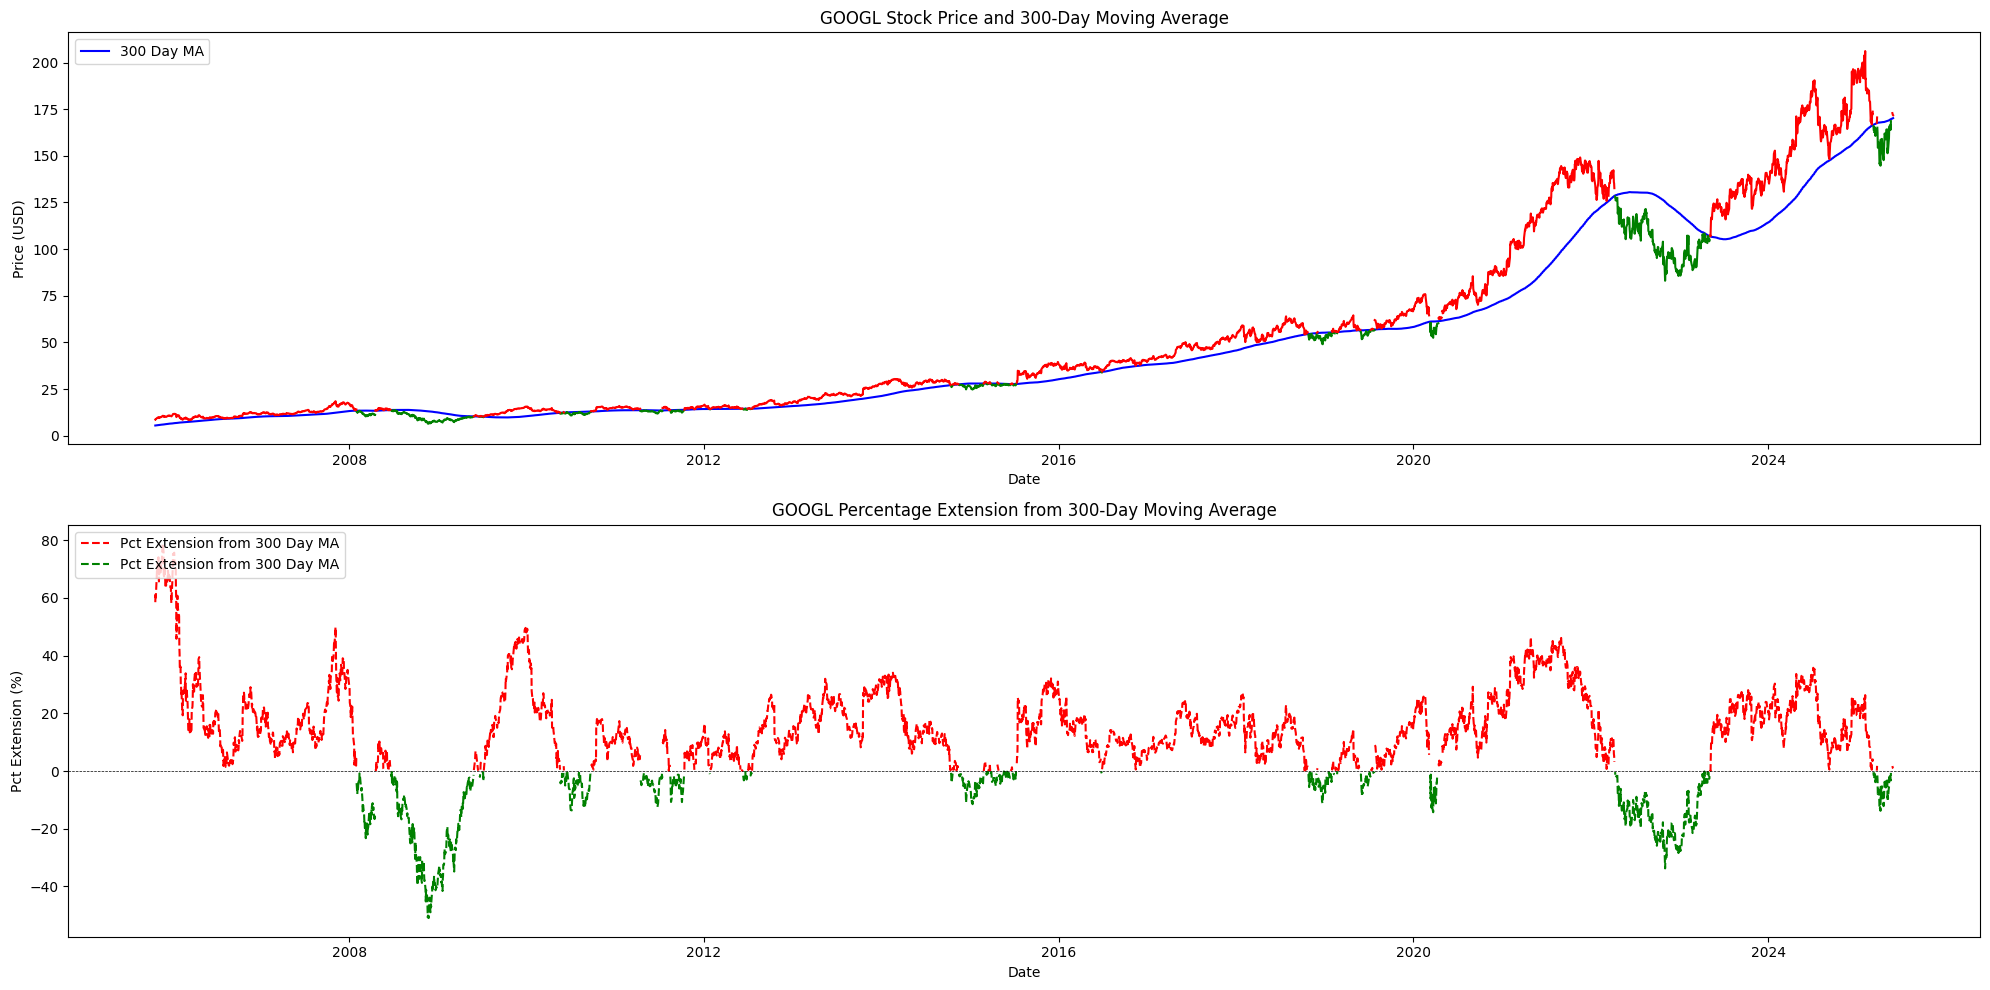

In [113]:
# plot Close & {moving_average}}DMA
fig, ax = plt.subplots(2, 1, figsize=(20, 10))

ax[0].plot(historical_data['Date'], historical_data[f'{moving_average}DMA'], label=f'{moving_average} Day MA', color='Blue')
ax[0].plot(historical_data['Date'], historical_data[f'Less_than_{moving_average}_DMA'], color='Green')
ax[0].plot(historical_data['Date'], historical_data[f'Greater_than_{moving_average}_DMA'], color='Red')

ax[0].set_title(f"{ticker_symbol} Stock Price and {moving_average}-Day Moving Average")
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Price (USD)')
ax[0].legend(loc='upper left')

ax[1].plot(historical_data['Date'], historical_data['Greater_than_0'], label=f'Pct Extension from {moving_average} Day MA', color='Red', linestyle='--')
ax[1].plot(historical_data['Date'], historical_data['Less_than_0'], label=f'Pct Extension from {moving_average} Day MA', color='Green', linestyle='--')
ax[1].axhline(0, color='black', linewidth=0.5, linestyle='--')
ax[1].set_title(f"{ticker_symbol} Percentage Extension from {moving_average}-Day Moving Average")
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Pct Extension (%)')
ax[1].legend(loc='upper left')

plt.tight_layout()
plt.show()